In [1]:
#@title uploading dataset
import pandas as pd
from google.colab import files
uploaded=files.upload()

import io
data=pd.read_excel(io.BytesIO(uploaded['clean_PV_Data1.xlsx']))

Saving clean_PV_Data1.xlsx to clean_PV_Data1.xlsx


In [2]:
#@title spliting inputs and targets
X = data.drop(['class'],axis=1).values
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

X1 = np.random.normal(0,0.004,(3500,7))
X= X + X1*X

minmax = MinMaxScaler()
pca = PCA(n_components=7)
pca.fit(X)
X= pca.transform(X)

#X1= df.drop(['class','Voc','Isc','Vmp','Imp','Pmp','T','G',],axis=1).values
Y=data.drop(['Voc','Isc','Vmp','Imp','Pmp','T','G'],axis=1).values.ravel()

In [3]:

# evaluate logistic regression fit on label propagation for semi-supervised learning
from numpy import concatenate
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation
from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import LabelSpreading
from sklearn import svm
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# define dataset
X, y = X, Y
y[y==0]=10

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.9334,
                                                                        random_state=42, stratify=y_train)
# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]
# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))
# define model
##model = LabelPropagation(kernel='knn',gamma=40, n_neighbors=4, max_iter=5000)
##model1= LabelSpreading(kernel='knn', gamma=40, n_neighbors=4, alpha=0.8, max_iter=5000)

## fit model on training dataset
##model.fit(X_train_mixed, y_train_mixed)
##yhat = model.predict(X_test)
# calculate score for test set
#s#core = accuracy_score(y_test, yhat)


##fit model on training dataset
#3model1.fit(X_train_mixed, y_train_mixed)
##yhat1 = model1.predict(X_test)
# calculate score for test set
##score1 = accuracy_score(y_test, yhat1)

# summarize score
##print('Accuracy: %.3f' % (score*100))
##print('Accuracy1: %.3f' % (score1*100))

In [6]:
#@title self-training
Dt = DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=10)
KNN = KNeighborsClassifier(n_neighbors=3)
NB = GaussianNB()
svc= svm.SVC(probability=True, gamma="auto", C=1000, kernel='rbf', degree=10)
RF= RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=20)
Ada = AdaBoostClassifier( n_estimators=600, learning_rate=0.1, algorithm='SAMME')
GB = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=600)

HGB = HistGradientBoostingClassifier(loss='log_loss', learning_rate=0.4, max_iter=280,max_leaf_nodes=150)

MLP = MLPClassifier(hidden_layer_sizes=(100,50), activation='logistic', solver='adam', alpha=0.001, max_iter =800 )

model1 = SelfTrainingClassifier(Dt)
model2 = SelfTrainingClassifier(KNN)
model3 = SelfTrainingClassifier(NB)
model4 = SelfTrainingClassifier(svc)
model5 = SelfTrainingClassifier(RF)
model6 = SelfTrainingClassifier(Ada)
model7 = SelfTrainingClassifier(GB)
model8 = SelfTrainingClassifier(HGB)
model9 = SelfTrainingClassifier(MLP)

# fit supervised learning model on entire training dataset
model1.fit(X_train_mixed, y_train_mixed)
model2.fit(X_train_mixed, y_train_mixed)
model3.fit(X_train_mixed, y_train_mixed)
model4.fit(X_train_mixed, y_train_mixed)
model5.fit(X_train_mixed, y_train_mixed)
model6.fit(X_train_mixed, y_train_mixed)
model7.fit(X_train_mixed, y_train_mixed)
model8.fit(X_train_mixed, y_train_mixed)
model9.fit(X_train_mixed, y_train_mixed)



# make predictions on hold out test set
yhat1 = model1.predict(X_test)
yhat2 = model2.predict(X_test)
yhat3 = model3.predict(X_test)
yhat4 = model4.predict(X_test)
yhat5 = model5.predict(X_test)
yhat6 = model6.predict(X_test)
yhat7 = model7.predict(X_test)
yhat8 = model8.predict(X_test)
yhat8_train = model8.predict(X_train)
yhat9 = model9.predict(X_test)

# calculate score for test set
score1 = accuracy_score(y_test, yhat1)
score2 = accuracy_score(y_test, yhat2)
score3 = accuracy_score(y_test, yhat3)
score4 = accuracy_score(y_test, yhat4)
score5 = accuracy_score(y_test, yhat5)
score6 = accuracy_score(y_test, yhat6)
score7 = accuracy_score(y_test, yhat7)
score8 = accuracy_score(y_test, yhat8)
score8_train = accuracy_score(y_train, yhat8_train)
score9 = accuracy_score(y_test, yhat9)

print('DT_Accuracy1: %.3f' % (score1*100))
print('KNN_Accuracy2: %.3f' % (score2*100))
print('NB_Accuracy3: %.3f' % (score3*100))
print('SVC_Accuracy4: %.3f' % (score4*100))
print('RF_Accuracy5: %.3f' % (score5*100))
print('Ada_Accuracy6: %.3f' % (score6*100))
print('GB_Accuracy7: %.3f' % (score7*100))
print('HGB_Accuracy8: %.3f'       % (score8*100))
print('HGB_Accuracy8_train: %.3f' % (score8_train*100))
print('MLP_Accuracy9: %.3f' % (score9*100))


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


DT_Accuracy1: 72.286
KNN_Accuracy2: 31.143
NB_Accuracy3: 60.000
SVC_Accuracy4: 20.571
RF_Accuracy5: 80.571
Ada_Accuracy6: 50.857
GB_Accuracy7: 79.714
HGB_Accuracy8: 85.429
HGB_Accuracy8_train: 86.921
MLP_Accuracy9: 65.714


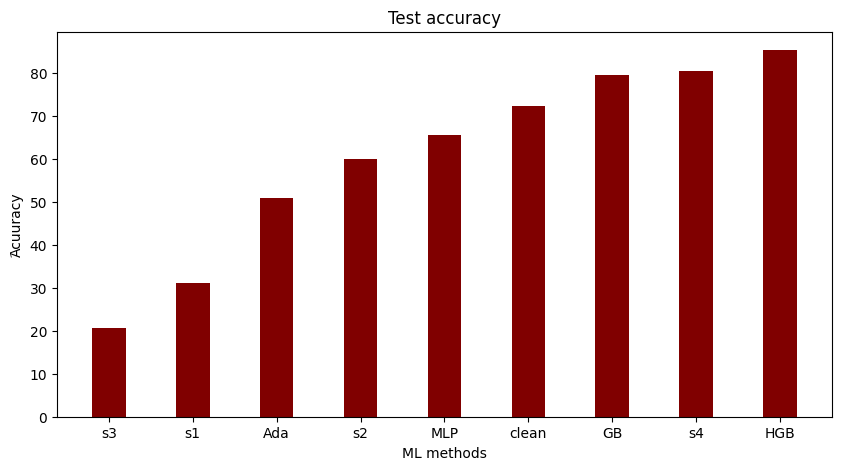

In [7]:
import matplotlib.pyplot as plt
data = {'clean':score1, 's1':score2, 's2':score3,'s3':score4, 's4':score5, 'Ada':score6, 'GB':score7, 'HGB':score8, 'MLP':score9}
data = sorted(data.items(), key=lambda x:x[1])

model = [i[0] for i in data]
score = [100*i[1] for i in data]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(model, score, color ='maroon',
        width = 0.4)

plt.xlabel("ML methods")
plt.ylabel("َAcuuracy")
plt.title("Test accuracy")
plt.show()


In [ ]:
#HGB = HistGradientBoostingClassifier(loss='log_loss', max_depth=20,learning_rate=0.1, max_iter=500)
#Rf = RF= RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=20)
Ada = AdaBoostClassifier( n_estimators=600, learning_rate=0.09, algorithm='SAMME.R')
model8 = SelfTrainingClassifier(Ada)
model8.fit(X_train_mixed, y_train_mixed)
yhat8 = model8.predict(X_test)

score8 = accuracy_score(y_test, yhat8)
print('Accuracy8: %.3f' % (score8*100))

Accuracy8: 78.857
